In [2]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

df = pd.read_csv('goodreads_books.csv')
print(len(df['language_code']))

allowed_values = ['eng', 'en-US', 'en-GB', 'en-CA'] 

filtered_df = df[df['language_code'].isin(allowed_values)]

print(len(filtered_df['language_code']))

2360654
865919


261.22573644231534
1267.3623665481525
248.0
0.0
945077.0


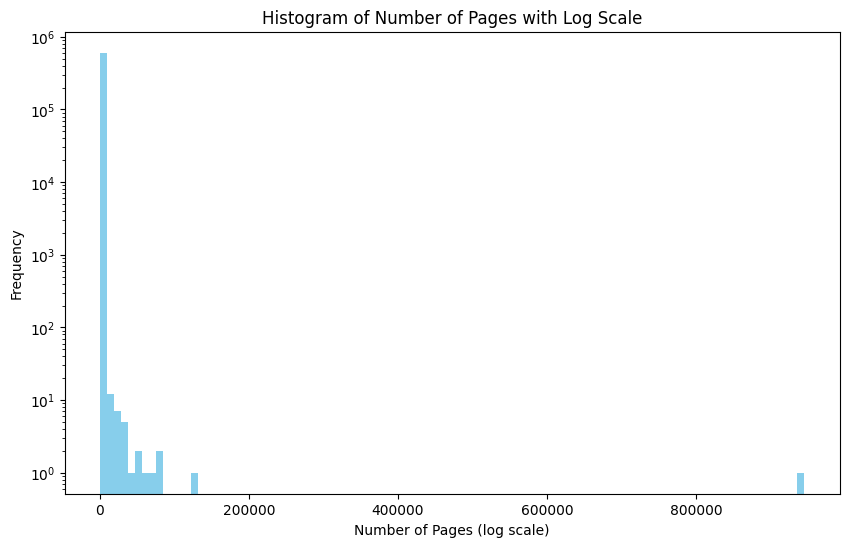

In [30]:
import matplotlib.pyplot as plt

# plt.subplot(2, 3, 1)
# plt.hist(filtered_df['num_pages'], bins=10, color='skyblue', edgecolor='black', log=True)
# plt.xlabel('Number of Pages')
# plt.ylabel('Frequency')
# plt.title('Histogram of Number of Pages')
# plt.tight_layout()
# plt.show()
print(filtered_df['num_pages'].mean())
print(filtered_df['num_pages'].std())
print(filtered_df['num_pages'].median())
print(filtered_df['num_pages'].min())
print(filtered_df['num_pages'].max())

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['num_pages'], bins=100, color='skyblue', log=True)
plt.xlabel('Number of Pages (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Pages with Log Scale')
plt.show()

601996


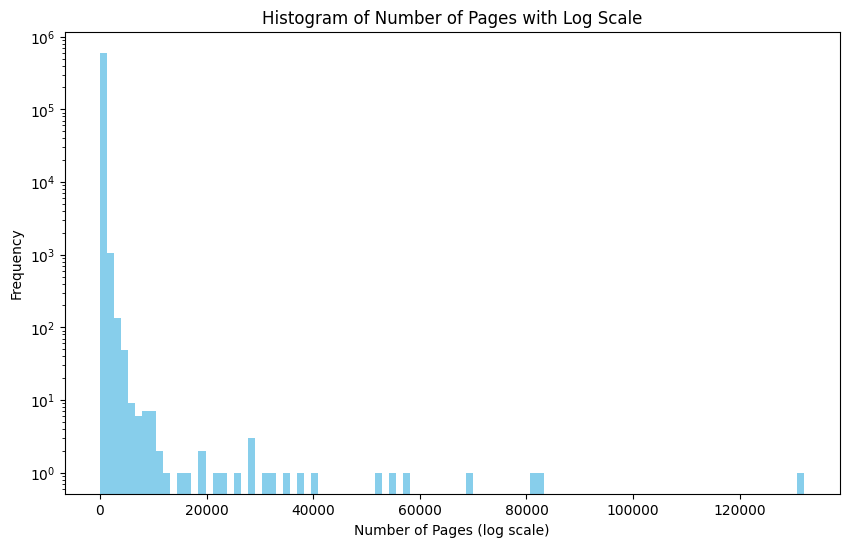

In [45]:
pages_filtered_df = filtered_df[filtered_df['num_pages'] >= 1]
pages_filtered_df = pages_filtered_df[pages_filtered_df['num_pages'] < 200000]
print(len(pages_filtered_df['num_pages']))
plt.figure(figsize=(10, 6))
plt.hist(pages_filtered_df['num_pages'], bins=100, color='skyblue', log=True)
plt.xlabel('Number of Pages (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Pages with Log Scale')
plt.show()

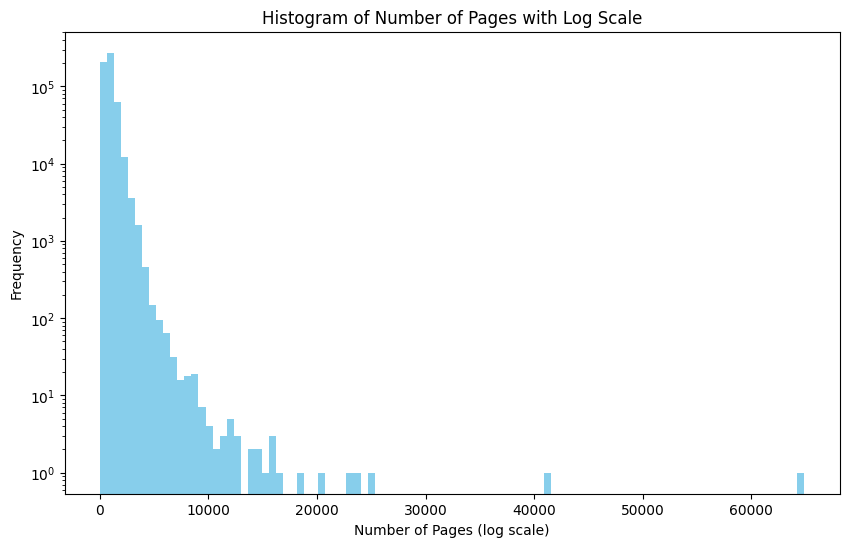

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(pages_filtered_df['description'].str.len(), bins=100, color='skyblue', log=True)
plt.xlabel('Number of Pages (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Pages with Log Scale')
plt.show()

In [65]:
desc_filtered = pages_filtered_df[pages_filtered_df['description'].str.len()>= 100]
print(len(desc_filtered['description']))
print(desc_filtered['description'].str.len().std())

551206
536.3265910034975


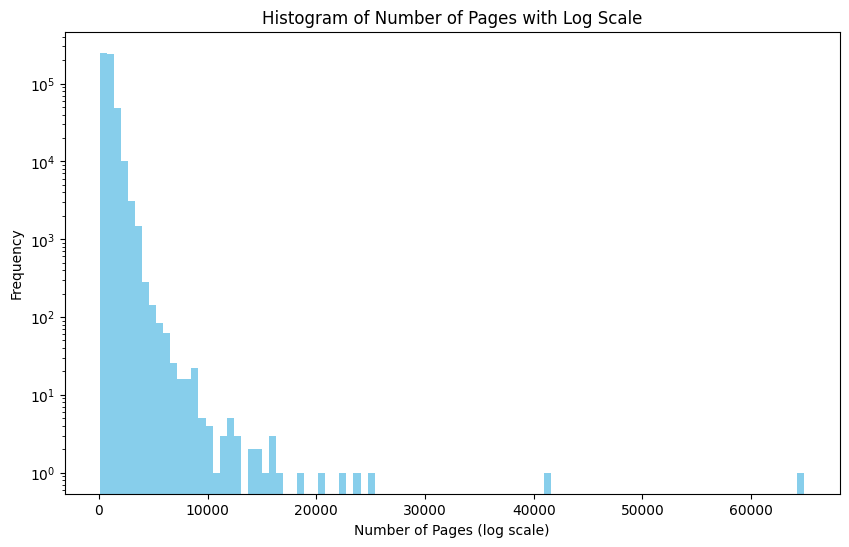

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(desc_filtered['description'].str.len(), bins=100, color='skyblue', log=True)
plt.xlabel('Number of Pages (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Pages with Log Scale')
plt.show()

In [ ]:
# desc_filtered
# df = pd.read_csv('goodreads_interactions.csv', nrows=100)
# df.head()

import pandas as pd

file_name = 'goodreads_interactions.csv'

chunk_size = 1000

filtered_df = pd.DataFrame()

for chunk in pd.read_csv(file_name, chunksize=chunk_size, parse_dates=['date_added', 'started_at']):
    chunk = chunk.dropna(subset=['date_added', 'started_at']) 
    chunk['date_added'] = pd.to_datetime(chunk['date_added'], errors='coerce')
    chunk['started_at'] = pd.to_datetime(chunk['started_at'], errors='coerce')
    chunk = chunk.dropna(subset=['date_added', 'started_at']) 

    condition = (chunk['started_at'] - chunk['date_added']) > pd.Timedelta(days=1)
    filtered_chunk = chunk[condition]


    filtered_df = pd.concat([filtered_df, filtered_chunk], ignore_index=True)




In [ ]:
for index, row in filtered_df.iterrows():
    time_difference = row['started_at'] - row['date_added']
    if time_difference < pd.Timedelta(days=1, hours=1):
        print(f"Row {index}: Time Difference = {time_difference}")

In [5]:
import pandas as pd

file_path = 'goodreads_books.csv'

df = pd.read_csv(file_path, usecols=['num_pages'])
print(len(df['num_pages']))

max_pages = df['num_pages'].max()
min_pages = df['num_pages'].min()
print(df['num_pages'].mean())
print(df['num_pages'].std())
print(df['num_pages'].median())

print(f"Highest number of pages: {max_pages}")
print(f"Lowest number of pages: {min_pages}")


2360654
263.56388574664174
829.8744162468141
245.0
Highest number of pages: 945077.0
Lowest number of pages: 0.0
